For the machine learning model to predict potential loan defaulters.

- Data Prepocessing
- Training ML Model
- Evaluating Model on Test Data

### In this notebook :
- Exploratory Data Analysis
- Data Cleaning:
  - Selecting relevant features
  - Null value imputation
  - Creating dummy variables
  - Handling outliers
  - Multicolinearity Check

## Imports and Functions


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
%cd "data\"
%ls

E:\job prep\company_ques\publicis_sapient\Loan Default Prediction (1)\Loan Default Prediction\data
 Volume in drive E is Work
 Volume Serial Number is 3C51-4D06

 Directory of E:\job prep\company_ques\publicis_sapient\Loan Default Prediction (1)\Loan Default Prediction\data

16-11-2023  19:36    <DIR>          .
16-11-2023  19:40    <DIR>          ..
16-11-2023  18:36    <DIR>          .ipynb_checkpoints
10-11-2023  22:11             3,012 Data_Dictionary.csv
10-11-2023  14:33        23,193,688 Dataset.csv
16-11-2023  19:34        18,238,484 df.csv
16-11-2023  19:34           280,480 model_rbst_scaler.ipynb
16-11-2023  18:36           294,966 model_rbst_scaler-Copy1.ipynb
16-11-2023  19:36           297,268 model_std_scaler.ipynb
16-11-2023  18:36           294,925 model_std_scaler-Copy1.ipynb
15-11-2023  03:41        34,781,041 RobustScaler_fd.csv
15-11-2023  03:41        34,781,041 StandardScaler_df.csv
               9 File(s)    112,164,905 bytes
               3 Dir(s)  169,207,94

#### Dataset has 40 columns including the output column 'Default'
 I created a dataframe = data_des_col from data desciption so that evaluation each column beco,es easy. This dataframe shows feature name, decription, first value, data type.

In [3]:
data=pd.read_csv("Dataset.csv")
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
data_des=pd.read_csv("Data_Dictionary.csv")
data_des.head()

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...


In [5]:
data_des_col = data.dtypes.reset_index().assign(first_value=data.iloc[0].values).rename(columns={'index': 'Variable', 0: 'dtype'})
data_des_col=data_des.merge(data_des_col, on='Variable',how='left')
data_des_col

,Variable,Description,dtype,first_value
0,ID,Client Loan application ID,int64,12142509
1,Client_Income,Client Income in $,object,6750
2,Car_Owned,Any Car owned by client before applying for th...,float64,0
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...,float64,0
4,Active_Loan,Any other active loan at the time of aplicatio...,float64,1
5,House_Own,Any house owned by client (0 means No and 1 me...,float64,0
6,Child_Count,Number of children the client has,float64,0
7,Credit_Amount,Credit amount of the loan in $,object,61190.55
8,Loan_Annuity,Loan annuity in $,object,3416.85
9,Accompany_Client,Who accompanied the client when client applied...,object,Alone


## Exploratory Data Analysis

Here I will go throught important features and analyse them. We'll use this information while data cleaning as well as training machine learning model.

data.shape

In [6]:
data[data['Default']==0].shape

(112011, 40)

In [7]:
data[data['Default']==1].shape

(9845, 40)

In [8]:
percentage_ratio = data['Default'].value_counts(normalize=True) * 100
percentage_ratio

0    91.920792
1     8.079208
Name: Default, dtype: float64

Data is skewed with the ratio of 92/8. That is, in 100 rows, only 8 rows refers to 'Default' case which is expected as defaulted cases will always be minimal.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [10]:
data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Columns: 40 entries, ID to Default
dtypes: float64(15), int64(5), object(20)
memory usage: 37.2+ MB


In [11]:
data.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


Inspecting Null values wrt rows and columns

In [12]:
data['Loan_Annuity'] = pd.to_numeric(data['Loan_Annuity'], errors='coerce')
data['Credit_Amount'] = pd.to_numeric(data['Credit_Amount'], errors='coerce')
data['Client_Income'] = pd.to_numeric(data['Client_Income'], errors='coerce')
data['Credit_Bureau'] = pd.to_numeric(data['Credit_Bureau'], errors='coerce')
data['Score_Source_1'] = pd.to_numeric(data['Score_Source_1'], errors='coerce')
data['Score_Source_2'] = pd.to_numeric(data['Score_Source_2'], errors='coerce')
data['Score_Source_3'] = pd.to_numeric(data['Score_Source_3'], errors='coerce')
data['Population_Region_Relative'] = pd.to_numeric(data['Population_Region_Relative'], errors='coerce')

In [13]:
# Convert values to strings and then define a function to extract and group organization types
def group_organization(org_type):
    pattern = re.compile(r'\b(?:Type|type)\s\d+\b')
    return re.sub(pattern, '', str(org_type)).strip()

# Apply the grouping function to create a new column
data['Type_Organization'] = data['Type_Organization'].apply(group_organization)

# Aggregate and calculate percentages for grouped values
grouped_counts = data['Type_Organization'].value_counts(normalize=True) * 100

In [14]:
xna_rows = data[data.eq('XNA').any(axis=1)]
xna_rows

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
6,12128086,15750.0,1.0,1.0,0.0,1.0,0.0,128835.00,3779.55,Alone,Retired,Secondary,S,Male,CL,Home,0.016612,21323,365243,113,4855,10.0,1,0,0,NaN,1.0,2.0,3.0,14.0,Yes,Yes,XNA,0.729913,0.602545,0.511892,0.2041,0.0,3.0,0
7,12215264,13500.0,0.0,0.0,1.0,1.0,0.0,60415.20,3097.80,Alone,Retired,Secondary,M,Male,CL,Home,0.009175,22493,365243,12617,5280,NaN,1,0,1,NaN,2.0,2.0,4.0,15.0,Yes,Yes,XNA,0.711468,0.657508,0.549597,NaN,1687.0,4.0,0
9,12130547,12150.0,0.0,0.0,0.0,1.0,0.0,16320.15,1294.65,Alone,Retired,Secondary,W,Male,CL,Home,0.016612,20507,365243,2834,4053,NaN,1,0,0,NaN,1.0,2.0,NaN,9.0,Yes,Yes,XNA,0.682285,0.063343,0.080650,NaN,533.0,5.0,0
13,12130196,8100.0,0.0,1.0,0.0,0.0,0.0,90000.00,3826.35,Relative,Retired,Secondary,M,Male,CL,Office,0.009630,21396,365243,8000,4591,NaN,1,0,1,NaN,2.0,2.0,5.0,16.0,Yes,Yes,XNA,NaN,0.585296,NaN,NaN,2488.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121831,12167066,9000.0,0.0,0.0,1.0,1.0,0.0,67500.00,2190.60,Alone,Retired,NaN,M,Female,CL,Family,0.016612,13628,365243,11525,3756,NaN,1,0,0,NaN,2.0,2.0,0.0,14.0,Yes,Yes,XNA,0.273106,0.534166,NaN,0.0165,2049.0,NaN,0
121841,12129641,7650.0,0.0,1.0,1.0,1.0,NaN,26955.00,1309.50,Alone,Retired,Secondary,M,Male,CL,Home,0.018850,22708,365243,8073,NaN,NaN,1,0,0,NaN,2.0,2.0,4.0,14.0,Yes,Yes,XNA,0.617768,0.647622,0.524496,NaN,2142.0,1.0,0
121842,12102970,9000.0,0.0,0.0,1.0,1.0,0.0,16810.20,1650.60,Alone,Retired,Secondary,W,Male,CL,Home,NaN,23635,NaN,1832,4800,NaN,1,0,0,NaN,1.0,3.0,1.0,13.0,Yes,Yes,XNA,0.800564,0.706519,NaN,0.0907,NaN,NaN,0
121846,12204389,12150.0,0.0,1.0,0.0,1.0,0.0,25470.00,1462.05,Alone,Retired,Graduation dropout,S,Male,CL,Home,0.025164,24123,365243,9523,795,NaN,1,0,0,NaN,1.0,2.0,NaN,9.0,Yes,Yes,XNA,0.720885,NaN,NaN,0.0711,0.0,0.0,0


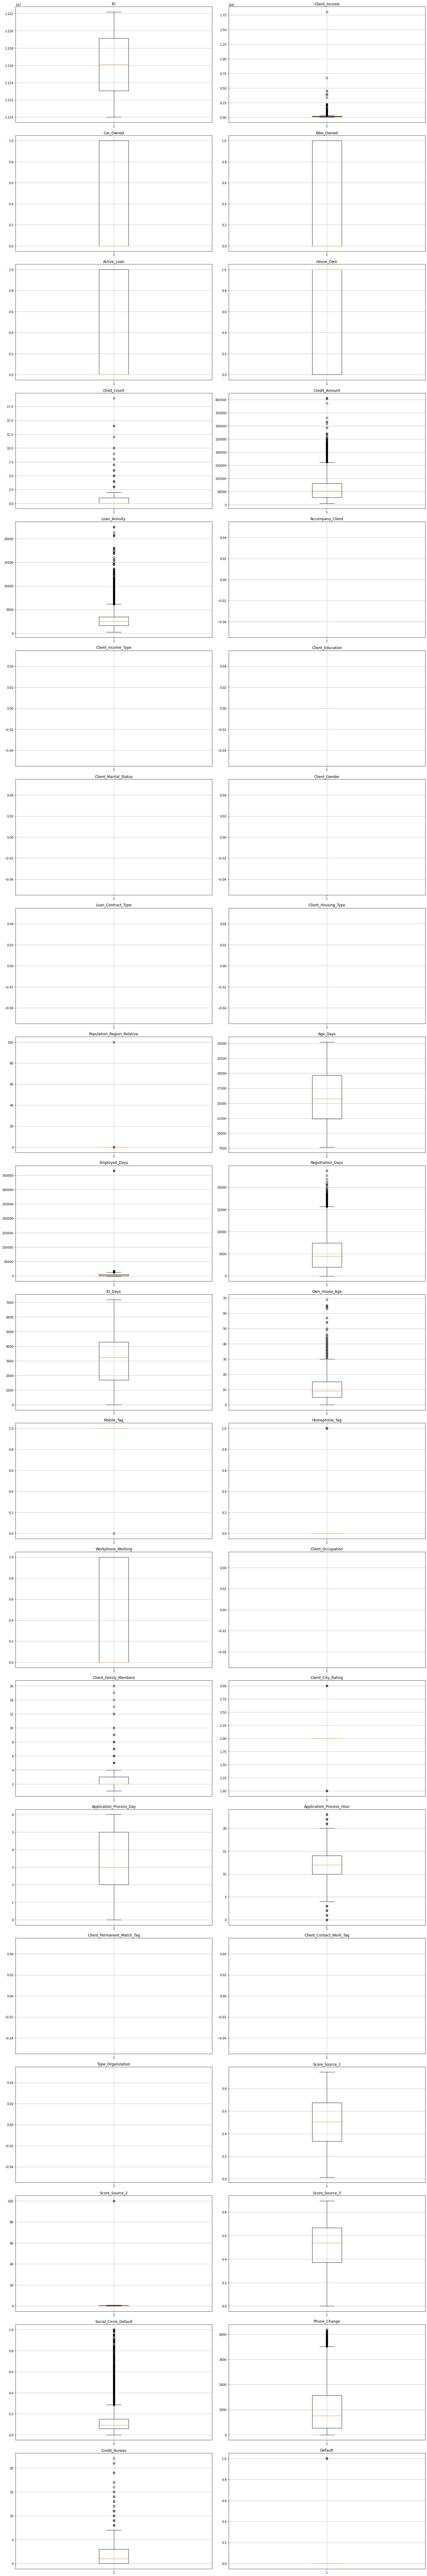

In [15]:
num_columns = len(data.columns)
num_rows = math.ceil(num_columns / 2)  # Adjust the number of rows based on the number of columns

plt.figure(figsize=(20, 6 * num_rows))  # Adjust the figure size based on the number of rows

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 2, i)  # Adjust the subplot configuration
    try:
        numeric_column = pd.to_numeric(data[column], errors='coerce')
        numeric_column.dropna(inplace=True)
        plt.boxplot(numeric_column)
        plt.title(column)
        plt.grid(True)
    except Exception as e:
        print(f"Column '{column}' could not be plotted: {str(e)}")

plt.tight_layout()
plt.show()

Outliers=Client_Income,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Employed_Days,Own_House_Age,
Social_Circle_Default,Score_Source_2,Client_Family_Members

In [16]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [17]:
data.isnull().sum(axis = 1).sort_values(ascending = False)

1261      12
1598      11
99788     11
87402     11
113616    11
          ..
56740      0
80133      0
56806      0
80108      0
11082      0
Length: 121856, dtype: int64

In [18]:
data.isnull().sum().sort_values(ascending = False)

Own_House_Age                 80095
Score_Source_1                68835
Social_Circle_Default         61928
Client_Occupation             41435
Score_Source_3                26922
Credit_Bureau                 18540
ID_Days                        5968
Score_Source_2                 5686
Population_Region_Relative     4868
Loan_Annuity                   4826
Client_Income_Type             3701
Client_Housing_Type            3687
Phone_Change                   3664
Application_Process_Hour       3663
House_Own                      3661
Loan_Contract_Type             3651
Employed_Days                  3649
Client_Education               3645
Child_Count                    3638
Credit_Amount                  3637
Active_Loan                    3635
Bike_Owned                     3624
Client_Income                  3622
Registration_Days              3614
Age_Days                       3600
Car_Owned                      3581
Client_Marital_Status          3473
Application_Process_Day     

In [19]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing.sort_values(ascending = False)

Own_House_Age                 65.729221
Score_Source_1                56.488806
Social_Circle_Default         50.820641
Client_Occupation             34.003250
Score_Source_3                22.093290
Credit_Bureau                 15.214680
ID_Days                        4.897584
Score_Source_2                 4.666163
Population_Region_Relative     3.994879
Loan_Annuity                   3.960412
Client_Income_Type             3.037191
Client_Housing_Type            3.025702
Phone_Change                   3.006828
Application_Process_Hour       3.006007
House_Own                      3.004366
Loan_Contract_Type             2.996159
Employed_Days                  2.994518
Client_Education               2.991236
Child_Count                    2.985491
Credit_Amount                  2.984670
Active_Loan                    2.983029
Bike_Owned                     2.974002
Client_Income                  2.972361
Registration_Days              2.965796
Age_Days                       2.954307


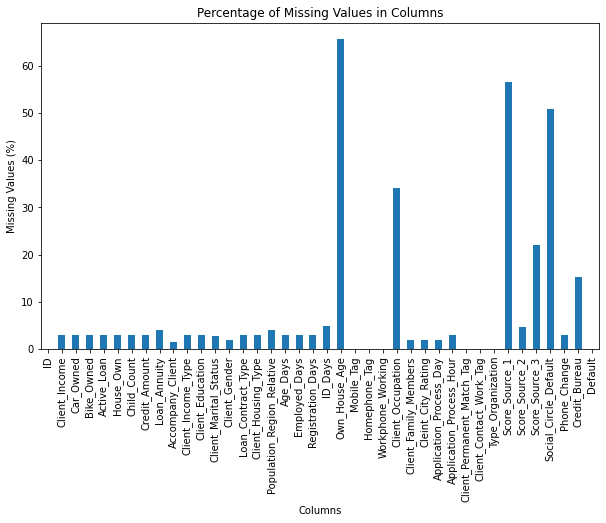

In [20]:
# Calculate percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.title('Percentage of Missing Values in Columns')
plt.xticks(rotation=90)
plt.show()


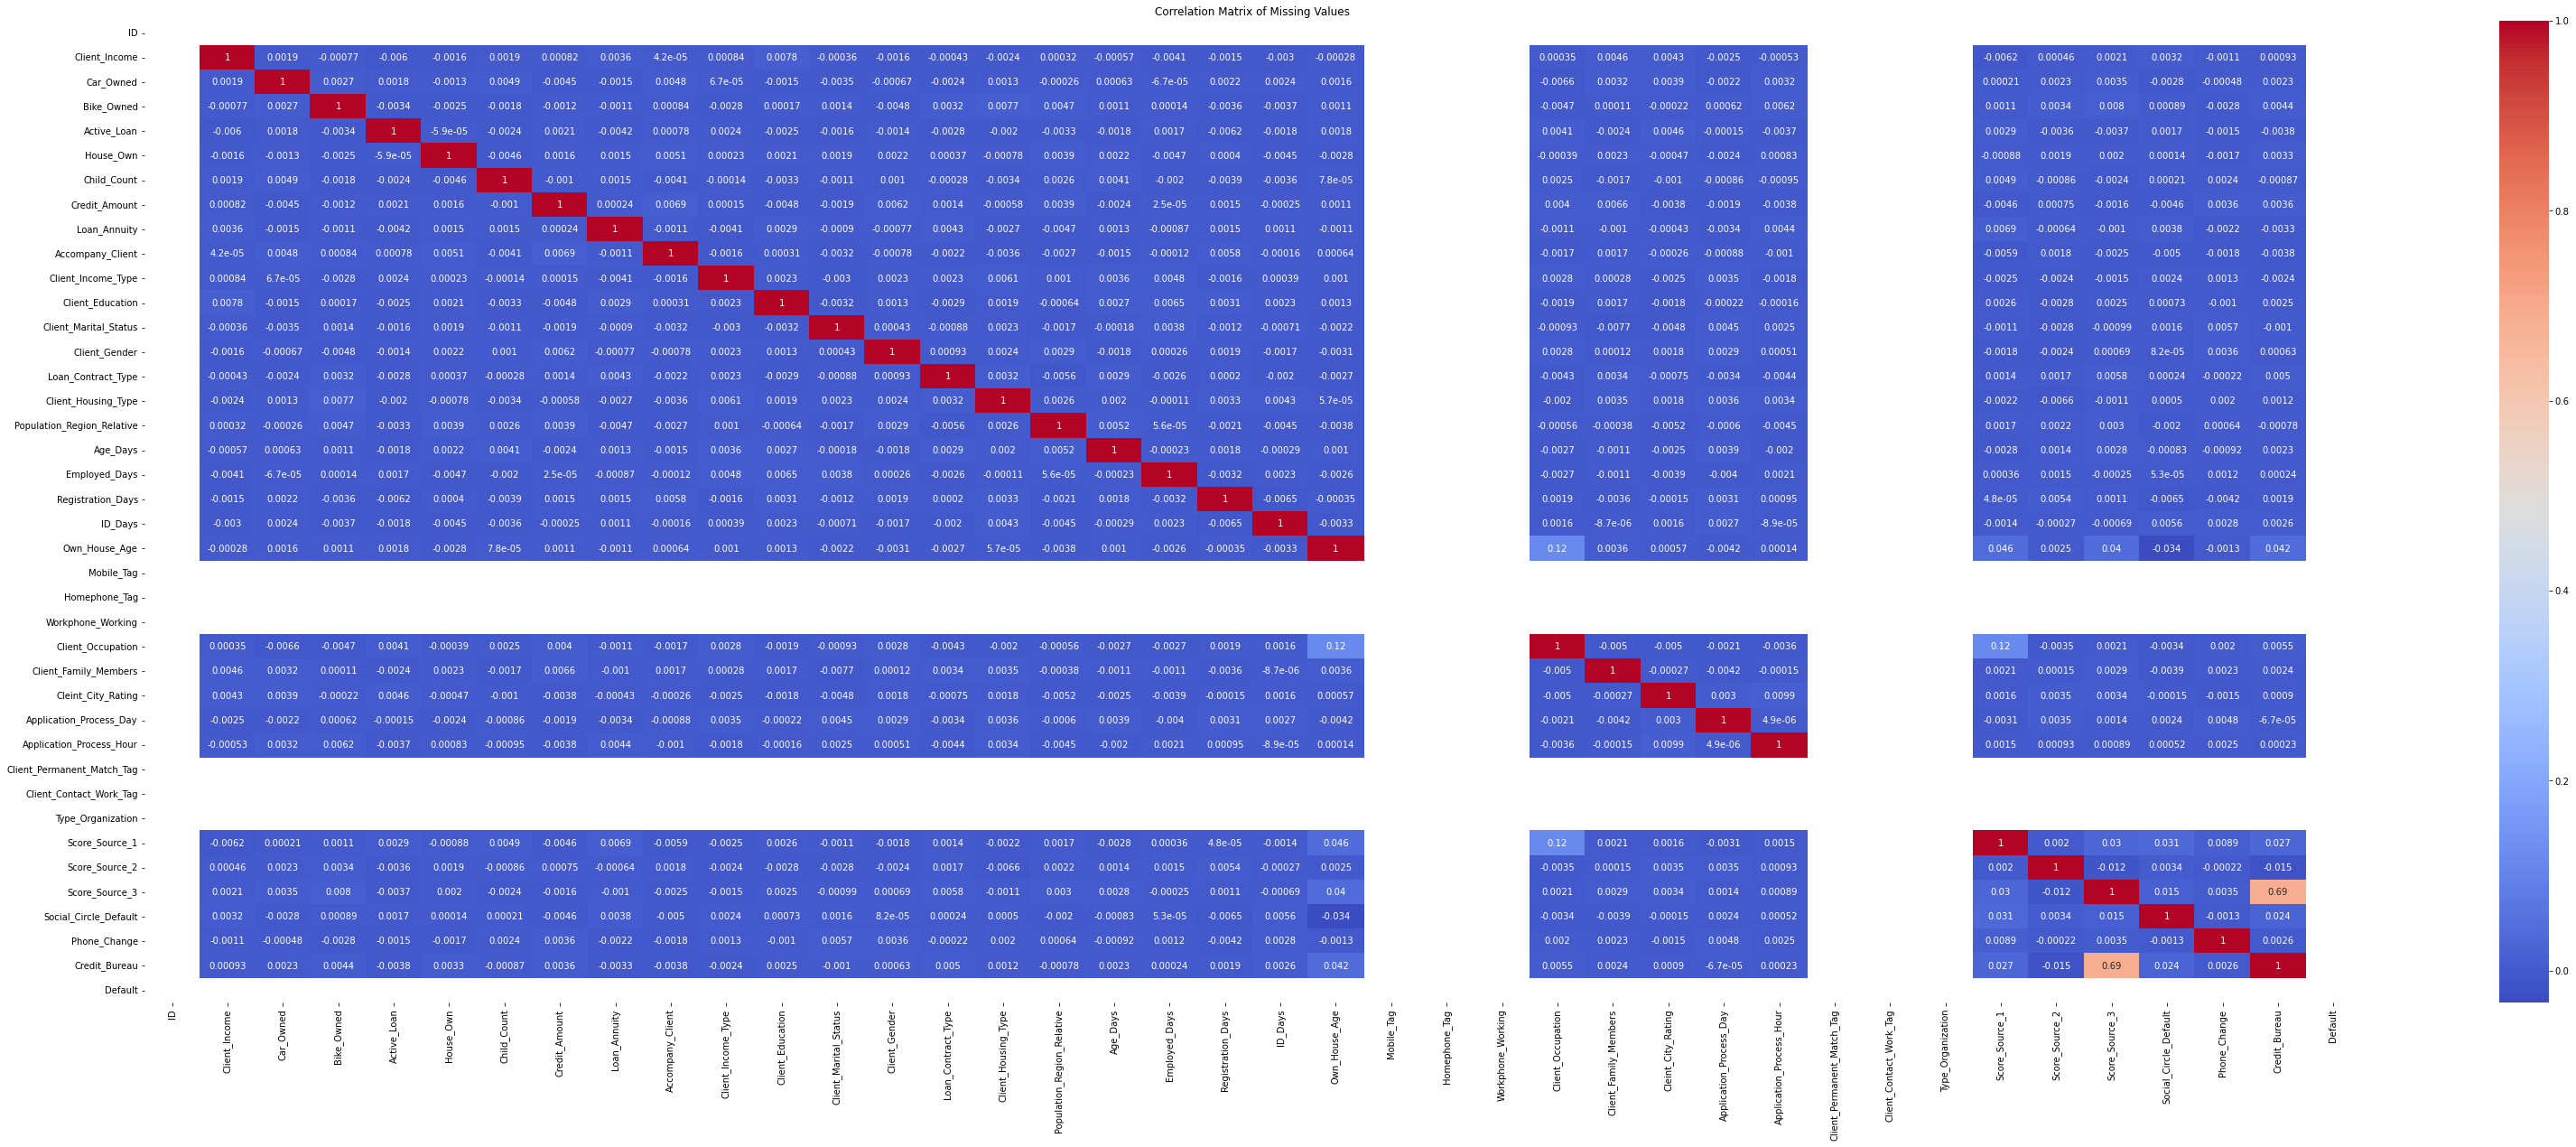

In [21]:
# Create a DataFrame indicating missing values (True for missing, False for present)
missing_data = data.isnull()

# Calculate the correlation matrix of missing values
missing_data_corr = missing_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(55, 20))
sns.heatmap(missing_data_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Missing Values')
plt.show()


Null Values of Score_Source_3 is higly correlated with Credit_Bureau ~0.7 i.e.  the 70% of enquiries in the last year came via Score source 3

There are some columns with more than 50% null values

In [22]:
check = data.isnull().sum() / len(data) 
cols_50 = check[check > 0.5].index
cols_50

Index(['Own_House_Age', 'Score_Source_1', 'Social_Circle_Default'], dtype='object')

In [23]:
cols_60 = check[check > 0.6].index
cols_60

Index(['Own_House_Age'], dtype='object')

Find out the columns that has too few or too much unique data

Inspecting Unique Rate wrt all columns 

In [24]:
unique_rate = data.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique rate and sort
unique_rate.head(10)

ID                   121856
Score_Source_2        67017
Score_Source_1        43969
Age_Days              22584
Registration_Days     19255
Employed_Days         13221
Loan_Annuity          10857
ID_Days                9656
Credit_Amount          4176
Phone_Change           3591
dtype: int64

In [25]:
unique_rate[unique_rate <= 9]

Client_Income_Type            9
Accompany_Client              8
Application_Process_Day       8
Client_Housing_Type           7
Client_Education              6
Client_Marital_Status         5
Client_Gender                 4
Cleint_City_Rating            4
Loan_Contract_Type            3
House_Own                     3
Active_Loan                   3
Bike_Owned                    3
Car_Owned                     3
Mobile_Tag                    2
Client_Permanent_Match_Tag    2
Client_Contact_Work_Tag       2
Homephone_Tag                 2
Workphone_Working             2
Default                       2
dtype: int64

Percent count of unique values for each column in the DataFrame that has a unique rate less than or equal to 9

- Credit_Amount is the initial loan amount that the borrower receives.
- Loan_Annuity is the regular installment  that the borrower pays to repay the loan along with interest, which is calculated based on the value of credit amount given and interest charge. Since here interest value and period in which loan repayment is required is not provided so taken amount as shared instead of formula based

In [26]:
for col in data:
    print(data[col].value_counts()*100/len(data[col]))

12101611    0.000821
12139917    0.000821
12148097    0.000821
12141954    0.000821
12144003    0.000821
              ...   
12184296    0.000821
12182249    0.000821
12188394    0.000821
12186347    0.000821
12101653    0.000821
Name: ID, Length: 121856, dtype: float64
13500.00    11.256729
11250.00     9.798451
15750.00     8.326221
18000.00     7.807576
9000.00      7.143678
              ...    
9657.90      0.000821
10174.05     0.000821
17865.00     0.000821
9495.00      0.000821
39510.00     0.000821
Name: Client_Income, Length: 1216, dtype: float64
0.0    63.783482
1.0    33.277803
Name: Car_Owned, dtype: float64
0.0    64.787946
1.0    32.238051
Name: Bike_Owned, dtype: float64
0.0    48.588498
1.0    48.428473
Name: Active_Loan, dtype: float64
1.0    67.126773
0.0    29.868862
Name: House_Own, dtype: float64
0.0     67.976956
1.0     19.228434
2.0      8.447676
3.0      1.173516
4.0      0.137047
5.0      0.027902
6.0      0.009848
7.0      0.003283
14.0     0.003283
10.0   

In [27]:
data['Client_Income']=data['Client_Income'].apply(lambda x: np.log1p(x)**2)
data['Credit_Amount']=data['Credit_Amount'].apply(lambda x: np.log1p(x)**2)
data['Loan_Annuity']=data['Loan_Annuity'].apply(lambda x: np.log1p(x)**2)
data['Score_Source_2']=data['Score_Source_2'].apply(lambda x: np.log1p(x)**2)


The loan annuity formula is represented as:

- AF = (1 – (1+r)-n ) ÷ r
- Instalment = Principal (Credit Amount) ÷ annuity factor 

Where:
- r = interest rate per period
- n = Total number of periods 
- AF = Annuity factor

In [28]:
data[["Loan_Annuity","Credit_Amount","Default"]].describe(include="all")

,Loan_Annuity,Credit_Amount,Default
count,117030.000000,118219.000000,121856.000000
mean,60.656857,116.504974,0.080792
std,8.389957,15.236601,0.272517
min,29.010065,70.762667,0.000000
25%,54.961145,104.114048,0.000000
50%,61.220390,117.813637,0.000000
75%,66.443295,127.702402,0.000000
max,100.426755,166.710572,1.000000


In [29]:
nulls_LA = data['Loan_Annuity'].isnull().sum()
nulls_CA = data['Credit_Amount'].isnull().sum()

# Display the number of null values in each column
print(f"Null values in Loan_Annuity: {nulls_LA}")
print(f"Null values in Credit_Amount: {nulls_CA}")

Null values in Loan_Annuity: 4826
Null values in Credit_Amount: 3637


In [30]:
#Both Included
null_rows = data[(data['Credit_Amount'].isnull()) & (data['Loan_Annuity'].isnull())]
null_default_count = null_rows['Default'].value_counts()
print("Default status for rows where 'Credit_Amount' and 'Loan_Annuity' are null:")
print(null_default_count)

Default status for rows where 'Credit_Amount' and 'Loan_Annuity' are null:
0    131
1     14
Name: Default, dtype: int64


In [31]:
#Either Included
rows_with_null = data[data['Credit_Amount'].isnull() | data['Loan_Annuity'].isnull()]
null_default_count = rows_with_null['Default'].value_counts()
print("Default status for rows where either 'Credit_Amount' or 'Loan_Annuity' is null:")
print(null_default_count)

Default status for rows where either 'Credit_Amount' or 'Loan_Annuity' is null:
0    7648
1     670
Name: Default, dtype: int64


In [32]:
# For Null
null_credit_amount = data[data['Credit_Amount'].isnull()]
credit_amount_null_default_count = null_credit_amount['Default'].value_counts()
print("Default status for rows where 'Credit_Amount' is null:")
print(credit_amount_null_default_count)
null_loan_annuity = data[data['Loan_Annuity'].isnull()]
loan_annuity_null_default_count = null_loan_annuity['Default'].value_counts()
print("\nDefault status for rows where 'Loan_Annuity' is null:")
print(loan_annuity_null_default_count)

Default status for rows where 'Credit_Amount' is null:
0    3362
1     275
Name: Default, dtype: int64

Default status for rows where 'Loan_Annuity' is null:
0    4417
1     409
Name: Default, dtype: int64


In [33]:
# For Not Null
not_null_credit_amount = data[data['Credit_Amount'].notnull()]
credit_amount_not_null_default_count = not_null_credit_amount['Default'].value_counts()
print("Default status for rows where 'Credit_Amount' is not null:")
print(credit_amount_not_null_default_count)
not_null_loan_annuity = data[data['Loan_Annuity'].notnull()]
loan_annuity_not_null_default_count = not_null_loan_annuity['Default'].value_counts()
print("\nDefault status for rows where 'Loan_Annuity' is not null:")
print(loan_annuity_not_null_default_count)

Default status for rows where 'Credit_Amount' is not null:
0    108649
1      9570
Name: Default, dtype: int64

Default status for rows where 'Loan_Annuity' is not null:
0    107594
1      9436
Name: Default, dtype: int64


In [34]:
correlation = data['Loan_Annuity'].corr(data['Default'])
correlation

-0.0005977748382988426

In [35]:
correlation = data['Credit_Amount'].corr(data['Default'])
correlation

-0.01398723992551292

In [36]:
correlation = data['Credit_Amount'].corr(data['Loan_Annuity'])
correlation

0.8391588380510634

In [37]:
correlation_matrix = data[['Credit_Amount', 'Loan_Annuity', 'Default']].corr()
correlation_matrix

,Credit_Amount,Loan_Annuity,Default
Credit_Amount,1.000000,0.839159,-0.013987
Loan_Annuity,0.839159,1.000000,-0.000598
Default,-0.013987,-0.000598,1.000000


- The correlation between 'Credit_Amount' and 'Loan_Annuity' is 0.768769, indicating a relatively strong positive correlation. This means that there is a positive linear relationship between these two variables.
- The correlations between 'Credit_Amount' or 'Loan_Annuity' with 'Default' are both close to zero (-0.031049 and -0.012109, respectively), indicating very weak correlations between the loan amount or annuity and the default status.

In [38]:
#relation between average Credit amount and Default
data[['Credit_Amount','Default']].groupby(by='Default').mean()

#Loan defaulters tend to apply for larger loans

,Credit_Amount
Default,
0,116.568224
1,115.786890


In [39]:
data[["Loan_Annuity","Credit_Amount","Client_Income"]].describe(include="all")

,Loan_Annuity,Credit_Amount,Client_Income
count,117030.000000,118219.000000,118234.000000
mean,60.656857,116.504974,92.528354
std,8.389957,15.236601,9.467308
min,29.010065,70.762667,61.624126
25%,54.961145,104.114048,87.015545
50%,61.220390,117.813637,91.681639
75%,66.443295,127.702402,98.326252
max,100.426755,166.710572,207.455131


In [40]:
data[["Credit_Amount","Client_Income"]].describe(include="all")

,Credit_Amount,Client_Income
count,118219.000000,118234.000000
mean,116.504974,92.528354
std,15.236601,9.467308
min,70.762667,61.624126
25%,104.114048,87.015545
50%,117.813637,91.681639
75%,127.702402,98.326252
max,166.710572,207.455131


In [41]:
#relation between average Client_Income and Default
data[['Client_Income','Default']].groupby(by='Default').mean()

,Client_Income
Default,
0,92.585603
1,91.877861


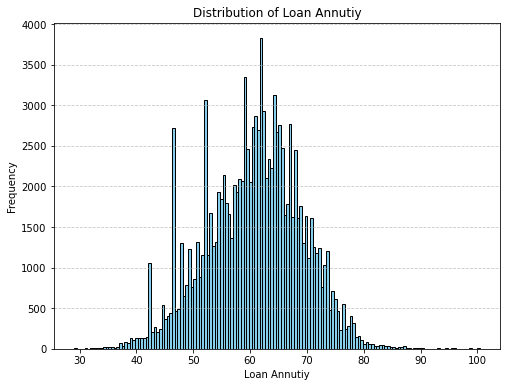

In [42]:
# Plot a histogram using original 'Loan_Annuity' values
plt.figure(figsize=(8, 6))
plt.hist(data['Loan_Annuity'].dropna(), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Loan Annutiy')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Annutiy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


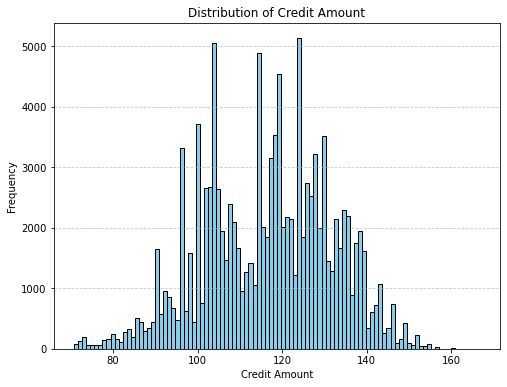

In [43]:
# Plot a histogram using original 'Credit_Amount' values
plt.figure(figsize=(8, 6))
plt.hist(data['Credit_Amount'].dropna(), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


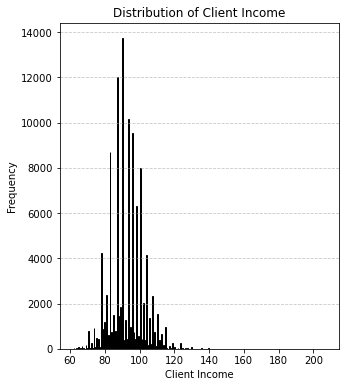

In [44]:
# Plot a histogram using original 'Client_Income' values
plt.figure(figsize=(5, 6))
plt.hist(data['Client_Income'].dropna(), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Client Income')
plt.ylabel('Frequency')
plt.title('Distribution of Client Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
data[["Loan_Annuity","Credit_Amount","Client_Income"]].describe(include="all")

,Loan_Annuity,Credit_Amount,Client_Income
count,117030.000000,118219.000000,118234.000000
mean,60.656857,116.504974,92.528354
std,8.389957,15.236601,9.467308
min,29.010065,70.762667,61.624126
25%,54.961145,104.114048,87.015545
50%,61.220390,117.813637,91.681639
75%,66.443295,127.702402,98.326252
max,100.426755,166.710572,207.455131


Analyzing Credit_Bureau and "Score_Source_1","Score_Source_2","Score_Source_3"
- Simplifying Credit_Bureau Column
- Removing Score_Source_3 as it has

In [46]:
mask = data["Credit_Bureau"] > 1  
data.loc[mask, "Credit_Bureau"] = 1  # Replace values greater than 1 with 1  

In [47]:
correlation = data['Score_Source_3'].corr(data['Credit_Bureau'])
correlation

-0.015925378766865977

In [48]:
data[["Credit_Bureau","Score_Source_1","Score_Source_2","Score_Source_3"]].describe(include="all")

,Credit_Bureau,Score_Source_1,Score_Source_2,Score_Source_3
count,103316.000000,53021.000000,1.161700e+05,94934.000000
mean,0.728958,0.501213,1.840147e-01,0.511180
std,0.444500,0.211204,1.782843e-01,0.194333
min,0.000000,0.014568,2.499988e-11,0.000527
25%,0.000000,0.333481,1.085188e-01,0.372334
50%,1.000000,0.504657,2.005892e-01,0.537070
75%,1.000000,0.673890,2.593163e-01,0.667458
max,1.000000,0.945741,2.129934e+01,0.896010


Analysing "Score_Source_1","Score_Source_2","Score_Source_3" Columns

In [49]:
data[["Score_Source_1","Score_Source_2","Score_Source_3"]].describe(include="all")


,Score_Source_1,Score_Source_2,Score_Source_3
count,53021.000000,1.161700e+05,94934.000000
mean,0.501213,1.840147e-01,0.511180
std,0.211204,1.782843e-01,0.194333
min,0.014568,2.499988e-11,0.000527
25%,0.333481,1.085188e-01,0.372334
50%,0.504657,2.005892e-01,0.537070
75%,0.673890,2.593163e-01,0.667458
max,0.945741,2.129934e+01,0.896010


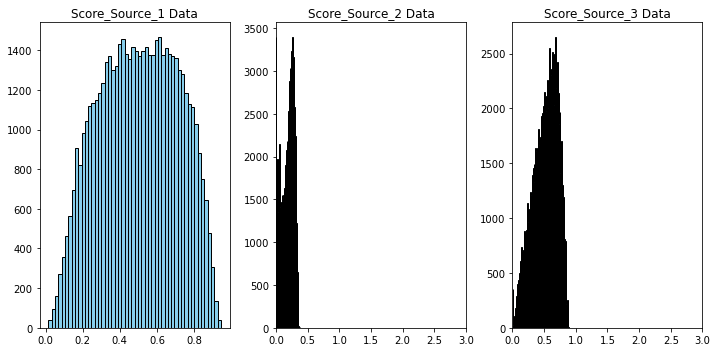

In [50]:
data1 = data['Score_Source_1'] 

# Plot histograms to compare 
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(data1, bins='auto', color='skyblue', edgecolor='black')
plt.title('Score_Source_1 Data')

data2 = data['Score_Source_2'] 

plt.subplot(1, 3, 2)
plt.hist(data2, bins='auto', color='skyblue', edgecolor='black')
plt.xlim(0, 3)  # Set x-axis limits for zooming in
plt.title('Score_Source_2 Data')

data3 = data['Score_Source_3'] 

plt.subplot(1, 3, 3)
plt.hist(data3, bins='auto', color='skyblue', edgecolor='black')
plt.xlim(0, 3)  # Set x-axis limits for zooming in
plt.title('Score_Source_3 Data')

plt.tight_layout()
plt.show()

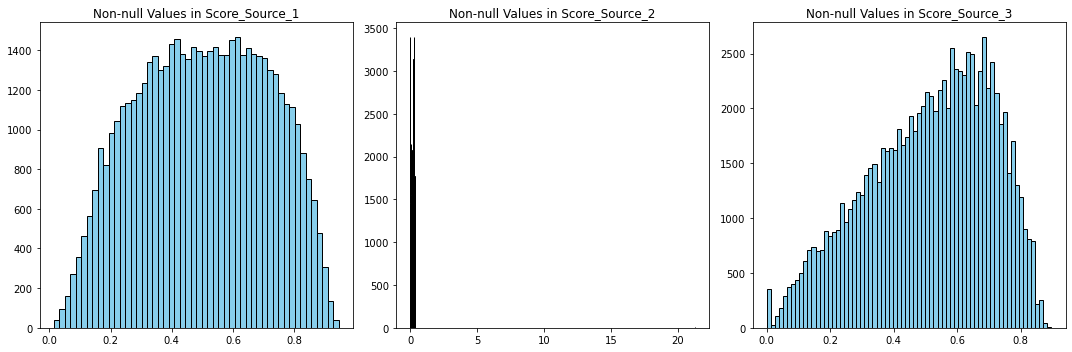

In [51]:
# Filter data for non-null values in Score_Source_1, Score_Source_2, and Score_Source_3
valid_data1 = data['Score_Source_1'][data['Score_Source_1'].notnull()]
valid_data2 = data['Score_Source_2'][data['Score_Source_2'].notnull()]
valid_data3 = data['Score_Source_3'][data['Score_Source_3'].notnull()]

# Plot histograms for non-null values in each column
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(valid_data1, bins='auto', color='skyblue', edgecolor='black')
plt.title('Non-null Values in Score_Source_1')

plt.subplot(1, 3, 2)
plt.hist(valid_data2, bins='auto', color='skyblue', edgecolor='black')
plt.title('Non-null Values in Score_Source_2')

plt.subplot(1, 3, 3)
plt.hist(valid_data3, bins='auto', color='skyblue', edgecolor='black')
plt.title('Non-null Values in Score_Source_3')

plt.tight_layout()
plt.show()


Analyzing "Client_Income_Type","Client_Occupation","Type_Organization" Columns

In [54]:
data[["Client_Income_Type","Client_Occupation","Type_Organization"]].describe(include="all")

,Client_Income_Type,Client_Occupation,Type_Organization
count,118155,80421,121856
unique,8,18,36
top,Service,Laborers,Business Entity
freq,61028,21024,32718


In [55]:
#data[cols].head(25)

In [56]:
cols=["Client_Income_Type","Client_Occupation","Type_Organization"]


<Figure size 4320x576 with 0 Axes>

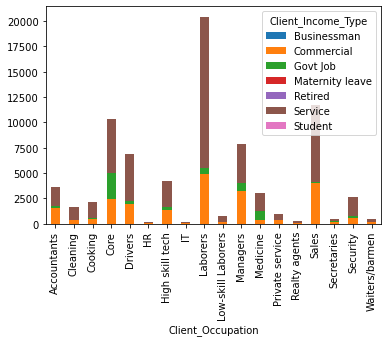

In [57]:
# Example: Creating a stacked bar plot for two categorical variables
cross_tab = pd.crosstab(data['Client_Occupation'], data['Client_Income_Type'])
plt.figure(figsize=(60, 8))
cross_tab.plot(kind='bar', stacked=True)
plt.show()

<Figure size 4320x576 with 0 Axes>

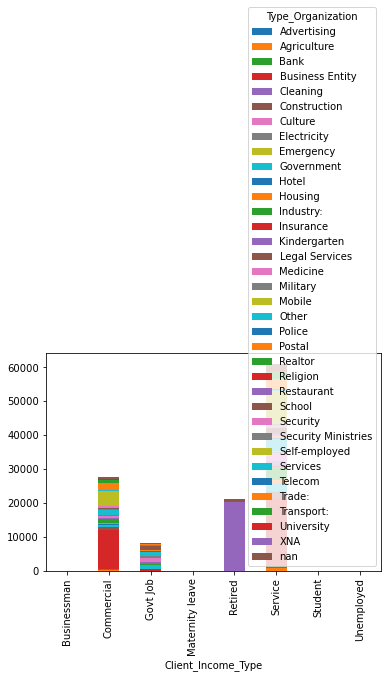

In [58]:
# Example: Creating a stacked bar plot for two categorical variables
cross_tab = pd.crosstab(data['Client_Income_Type'], data['Type_Organization'])
plt.figure(figsize=(60, 8))
cross_tab.plot(kind='bar', stacked=True)
plt.show()

<Figure size 4320x576 with 0 Axes>

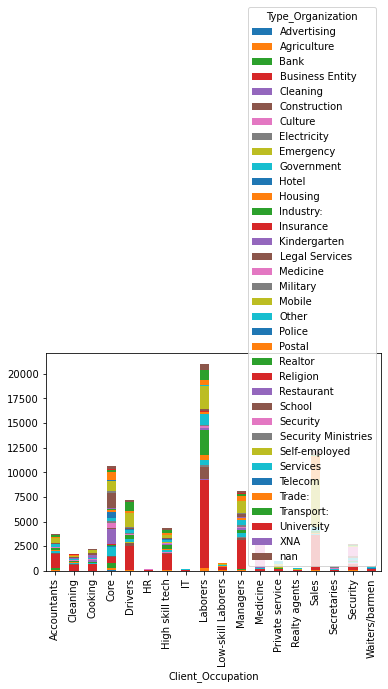

In [59]:
# Example: Creating a stacked bar plot for two categorical variables
cross_tab = pd.crosstab(data['Client_Occupation'], data['Type_Organization'])
plt.figure(figsize=(60, 8))
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [60]:
cols=["Car_Owned","Bike_Owned","Active_Loan","House_Own","Default"]

In [61]:
data['Total_Owned'] = data[['Car_Owned', 'Bike_Owned']].sum(axis=1)

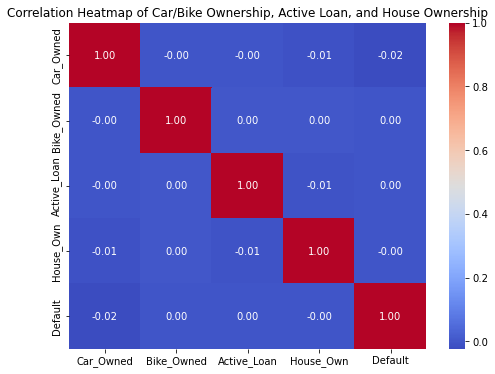

In [62]:
corr_matrix = data[cols].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Car/Bike Ownership, Active Loan, and House Ownership')
plt.show()

since value of Active_Loan is not provided so as values of Car_Owned,Bike_Owned,House owned assumed the set off each other so only value to be considered for processing loan is client income (As values are not known)

In [63]:
#relationship between 'Client_Housing_Type' and 'House_Own'
cross_tab = pd.crosstab(data['Client_Housing_Type'], data['House_Own'], normalize='index')
cross_tab

House_Own,0.0,1.0
Client_Housing_Type,,
Family,0.623346,0.376654
Home,0.271281,0.728719
Municipal,0.610963,0.389037
Office,0.445820,0.554180
Rental,0.585601,0.414399
Shared,0.384793,0.615207


The combined_housing_ownership() function checks the 'Client_Housing_Type' and 'House_Own' columns to determine if a client owns a house based on certain housing types ('Home') or the 'House_Own' column directly.

In [64]:
# Function to create a combined column based on housing type and ownership
def housing_ownership(row):
    if pd.notnull(row['Client_Housing_Type']):  # Check if 'Client_Housing_Type' is not null
        if row['Client_Housing_Type'] == 'Home':  # Check if housing type is 'Home'
            return 1  # Indicates owning a house
    return 0  # Indicates not owning a house or null value

# Apply the function to create the new combined column
data['Housing_Ownership'] = data.apply(housing_ownership, axis=1)


In [65]:
correlation = data['Housing_Ownership'].corr(data['Default'])
correlation

-0.026749556788437556

In [66]:
# Define a function to categorize non-null values as '1-5' or '>6'
def categorize_members(value):
    if pd.notnull(value):  # Check if the value is not null
        if value <= 5:
            return '0'
        else:
            return '1'
    return value  # Return the value unchanged if it's null

# Apply the categorization function to the 'Client_Occupation' column
data['Client_Family_Members'] = data['Client_Family_Members'].apply(categorize_members)


In [67]:
correlation = data['Cleint_City_Rating'].corr(data['Default'])
correlation

0.058857130145510556

In [68]:
correlation = data['Population_Region_Relative'].corr(data['Default'])
correlation

-0.0023950875320226375

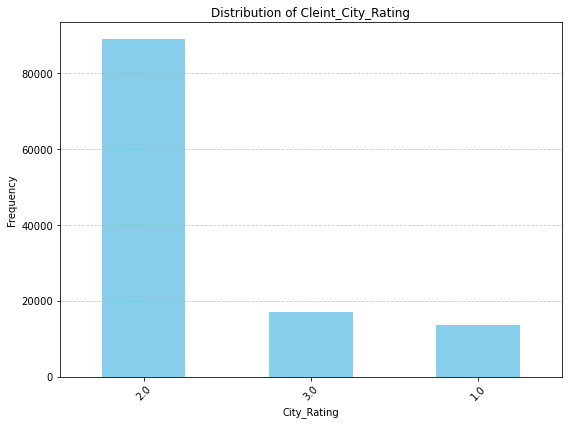

In [69]:
# Plotting the distribution of 'Client_Marital_Status'
plt.figure(figsize=(8, 6))
data['Cleint_City_Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('City_Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Cleint_City_Rating')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

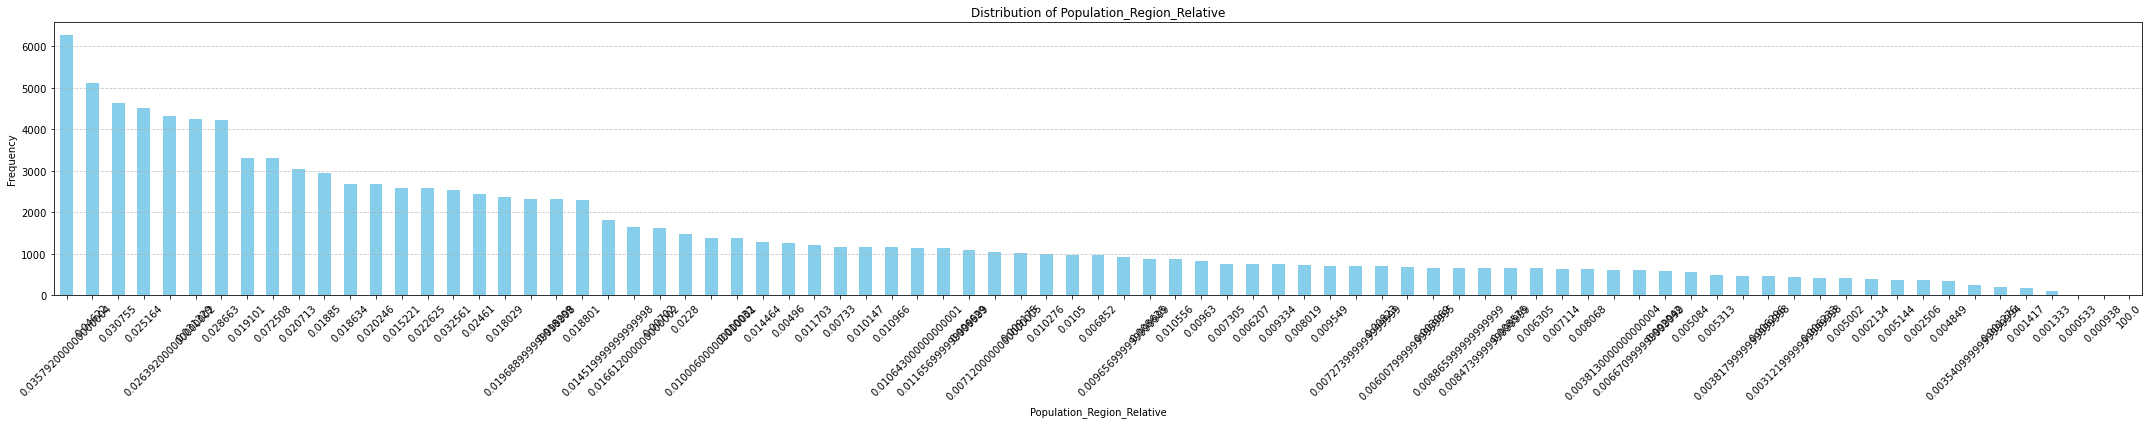

In [70]:
plt.figure(figsize=(30, 6))
data['Population_Region_Relative'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Population_Region_Relative')
plt.ylabel('Frequency')
plt.title('Distribution of Population_Region_Relative')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [71]:
correlation = data['Cleint_City_Rating'].corr(data['Default'])
correlation

0.058857130145510556

In [72]:
correlation = data['Social_Circle_Default'].corr(data['Default'])
correlation

-0.03263070047720883

In [73]:
correlation = data['Population_Region_Relative'].corr(data['Default'])
correlation

-0.0023950875320226375

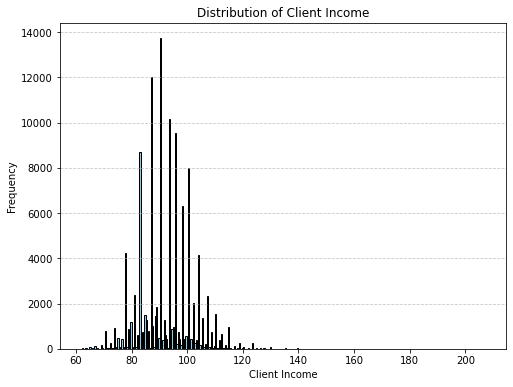

In [74]:
# Plot a histogram using original 'Client_Income' values
plt.figure(figsize=(8, 6))
plt.hist(data['Client_Income'].dropna(), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Client Income')
plt.ylabel('Frequency')
plt.title('Distribution of Client Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


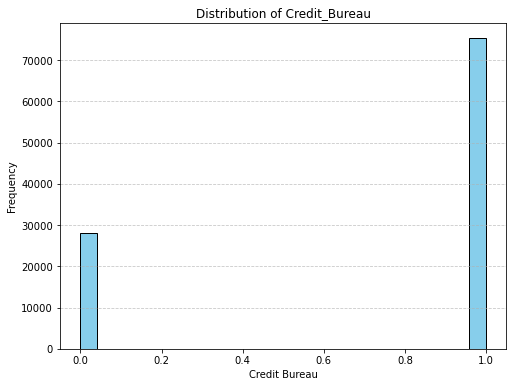

In [75]:
# Plot a histogram using original 'Client_Income' values
plt.figure(figsize=(8, 6))
plt.hist(data['Credit_Bureau'].dropna(), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Credit Bureau')
plt.ylabel('Frequency')
plt.title('Distribution of Credit_Bureau')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


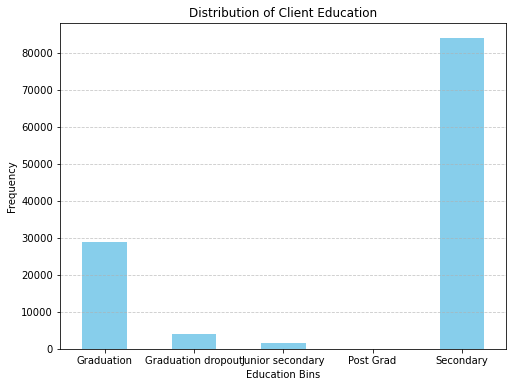

In [76]:
# Plotting the distribution of 'Client_Education' after binning
plt.figure(figsize=(8, 6))
data['Client_Education'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Education Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Client Education')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


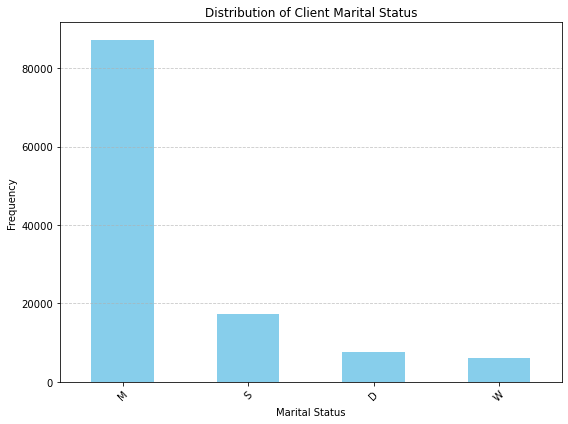

In [77]:
# Plotting the distribution of 'Client_Marital_Status'
plt.figure(figsize=(8, 6))
data['Client_Marital_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Client Marital Status')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


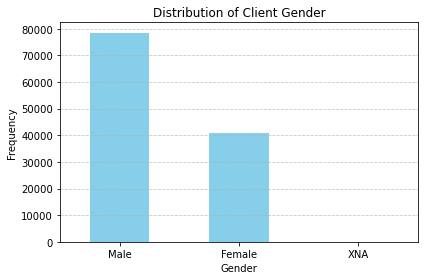

In [78]:
# Plotting the distribution of 'Client_Gender'
plt.figure(figsize=(6, 4))
data['Client_Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Client Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


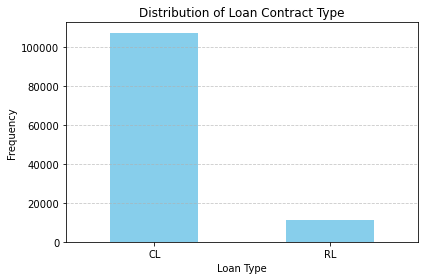

In [79]:
# Plotting the distribution of 'Loan_Contract_Type'
plt.figure(figsize=(6, 4))
data['Loan_Contract_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Contract Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [80]:
correlation=data.corr(method='kendall')
correlation

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Total_Owned,Housing_Ownership
ID,1.000000,0.000973,-0.002868,-0.001213,-0.000683,0.000479,-0.006448,-0.000664,-0.000633,0.000622,0.002587,-0.001678,-0.004725,0.003160,-0.001748,0.001086,-0.000759,-0.000826,-0.003749,-0.002953,0.002033,-0.000065,-0.001122,0.000353,-0.002808,-0.003191
Client_Income,0.000973,1.000000,0.186220,-0.002890,0.001730,0.006735,0.027911,0.291706,0.343305,0.065386,-0.156823,0.001206,-0.053296,-0.012885,-0.187122,-0.003540,0.073202,0.034106,0.117351,-0.050588,0.077193,0.042082,0.030178,-0.015963,0.121576,0.005205
Car_Owned,-0.002868,0.186220,1.000000,-0.000409,-0.001577,-0.008344,0.102277,0.090012,0.114898,0.036056,NaN,-0.004026,0.011443,-0.008597,-0.021699,-0.004190,0.012835,-0.032443,0.040722,-0.006187,0.019499,0.027582,-0.014837,-0.023221,0.681701,0.012869
Bike_Owned,-0.001213,-0.002890,-0.000409,1.000000,0.001545,0.002125,0.003047,0.003981,-0.000339,0.000340,0.005740,-0.004123,-0.002272,-0.005849,0.000174,-0.003241,0.000881,-0.003473,-0.003622,-0.004038,-0.001010,-0.003426,-0.002434,0.000431,0.673180,0.003219
Active_Loan,-0.000683,0.001730,-0.001577,0.001545,1.000000,-0.005709,0.001194,-0.000053,-0.001371,0.003719,-0.004444,0.002904,0.001333,0.000222,-0.002546,0.001539,0.003691,0.000403,0.000521,0.001727,0.005453,0.007239,0.005256,0.000240,-0.000890,-0.001299
House_Own,0.000479,0.006735,-0.008344,0.002125,-0.005709,1.000000,-0.007160,-0.031465,-0.005141,0.019173,-0.007878,-0.001940,-0.112196,-0.040484,0.003420,0.009505,-0.086336,0.043706,0.001559,0.024647,0.011606,-0.019041,0.064393,-0.001011,-0.003662,0.197401
Child_Count,-0.006448,0.027911,0.102277,0.003047,0.001194,-0.007160,1.000000,-0.000100,0.018929,-0.025288,0.004240,0.001811,0.047318,-0.034043,0.020878,-0.000411,-0.002409,-0.087259,-0.014060,-0.030217,-0.010143,0.008317,-0.016466,0.021353,0.069434,-0.027479
Credit_Amount,-0.000664,0.291706,0.090012,0.003981,-0.000053,-0.031465,-0.000100,1.000000,0.640863,0.036822,-0.071014,0.001950,-0.027620,0.018186,-0.075880,-0.003021,0.035342,0.071397,0.082415,0.016479,0.034850,0.050491,-0.022850,-0.013687,0.062481,0.030057
Loan_Annuity,-0.000633,0.343305,0.114898,-0.000339,-0.001371,-0.005141,0.018929,0.640863,1.000000,0.036773,-0.071886,-0.000217,-0.025677,0.006722,-0.100413,-0.000126,0.038626,0.049547,0.080416,0.008673,0.043346,0.043410,0.006020,0.000075,0.076128,0.018532
Population_Region_Relative,0.000622,0.065386,0.036056,0.000340,0.003719,0.019173,-0.025288,0.036822,0.036773,1.000000,-0.091234,0.001618,-0.012941,0.053417,-0.353316,-0.003858,0.091996,0.033272,0.124947,-0.000052,0.106586,0.023760,-0.002279,-0.023894,0.023785,0.011265


In [81]:
correlation = data['Mobile_Tag'].corr(data['Homephone_Tag'])
correlation

0.001434580272867981

In [82]:
correlation = data['Homephone_Tag'].corr(data['Workphone_Working'])
correlation

0.29017073090220913

In [83]:
correlation = data['Workphone_Working'].corr(data['Default'])
correlation

-0.025681844446882353

In [84]:
correlation = data['Homephone_Tag'].corr(data['Default'])
correlation

0.02159290291851757

In [85]:
cross_tab = pd.crosstab(data['Homephone_Tag'], data['Mobile_Tag'], normalize='index')

print(cross_tab)

Mobile_Tag           0        1
Homephone_Tag                  
0              0.00001  0.99999
1              0.00000  1.00000


These time-related aspects can help in assessing the stability, reliability, and financial behavior of the clients, potentially influencing loan approval decisions or risk assessment strategies in financial institutions.

In [86]:
# Convert age in days to age in years
data['Age_Days'] = pd.to_numeric(data['Age_Days'], errors='coerce')
data['Age_years']= (data['Age_Days'] / 365).round()
data['Age_years'] = pd.to_numeric(data['Age_years'], errors='coerce').astype('Int64')

In [87]:
data['Employed_Days'] = pd.to_numeric(data['Employed_Days'], errors='coerce')
data['Employed_years']= (data['Employed_Days'] / 365).round()
data['Employed_years'] = pd.to_numeric(data['Employed_years'], errors='coerce').astype('Int64')

In [88]:
data['Registration_Days'] = pd.to_numeric(data['Registration_Days'], errors='coerce')
data['Registration_years']= (data['Registration_Days'] / 365).round()
data['Registration_years'] = pd.to_numeric(data['Registration_years'], errors='coerce').astype('Int64')

In [89]:
data['ID_Days'] = pd.to_numeric(data['ID_Days'], errors='coerce')
data['ID_years']= (data['ID_Days'] / 365).round()
data['ID_years'] = pd.to_numeric(data['ID_years'], errors='coerce').astype('Int64')

In [90]:
# Function to determine if a day number corresponds to a weekend or weekday
def weekend_or_weekday(day_number):
    return 0 if day_number in [0, 6] else 1
# Create a new column 'weekend_or_weekday_code' with 0 for weekends and 1 for weekdays
data['Appli_Process_Day'] = data['Application_Process_Day'].apply(weekend_or_weekday)
#data['Appli_Process_Day'].astype('int64')

In [91]:
# Function to categorize hours into morning, afternoon, and evening
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 0  # Morning
    elif 12 <= hour < 18:
        return 1  # Afternoon
    else:
        return 2  # Evening

# Create a new column 'Hour_Category' with values 0, 1, 2 for morning, afternoon, evening
data['Appli_Process_Hour'] = data['Application_Process_Hour'].apply(categorize_hour)


In [92]:
data[data['Employed_years']==1001]


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Total_Owned,Housing_Ownership,Age_years,Employed_years,Registration_years,ID_years,Appli_Process_Day,Appli_Process_Hour
3,12188929,93.405636,0.0,0.0,1.0,1.0,0.0,118.686971,59.893974,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,1,0,0,NaN,0,3.0,2.0,15.0,Yes,Yes,XNA,0.501213,0.016077,0.631355,NaN,1700.0,1.0,0,0.0,1,64,1001,<NA>,2,1,1
6,12128086,93.405636,1.0,1.0,0.0,1.0,0.0,138.445711,67.858462,Alone,Retired,Secondary,S,Male,CL,Home,0.016612,21323.0,365243.0,113.0,4855.0,10.0,1,0,0,NaN,0,2.0,3.0,14.0,Yes,Yes,XNA,0.729913,0.222400,0.511892,0.2041,0.0,1.0,0,2.0,1,58,1001,0,13,1,1
7,12215264,90.449972,0.0,0.0,1.0,1.0,0.0,121.198358,64.621827,Alone,Retired,Secondary,M,Male,CL,Home,0.009175,22493.0,365243.0,12617.0,5280.0,NaN,1,0,1,NaN,0,2.0,4.0,15.0,Yes,Yes,XNA,0.711468,0.255343,0.549597,NaN,1687.0,1.0,0,0.0,1,62,1001,35,14,1,1
9,12130547,88.457162,0.0,0.0,0.0,1.0,0.0,94.094212,51.362560,Alone,Retired,Secondary,W,Male,CL,Home,0.016612,20507.0,365243.0,2834.0,4053.0,NaN,1,0,0,NaN,0,2.0,NaN,9.0,Yes,Yes,XNA,0.682285,0.003772,0.080650,NaN,533.0,1.0,0,0.0,1,56,1001,8,11,1,0
13,12130196,80.995370,0.0,1.0,0.0,0.0,0.0,130.132792,68.061311,Relative,Retired,Secondary,M,Male,CL,Office,0.009630,21396.0,365243.0,8000.0,4591.0,NaN,1,0,1,NaN,0,2.0,5.0,16.0,Yes,Yes,XNA,0.501213,0.212310,0.511180,NaN,2488.0,NaN,0,1.0,0,59,1001,22,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121825,12192622,82.902681,0.0,0.0,1.0,1.0,0.0,132.316369,63.606616,Alone,Retired,Secondary,NaN,Male,CL,Home,0.018209,22986.0,365243.0,2923.0,3943.0,NaN,1,0,1,NaN,0,3.0,5.0,7.0,Yes,Yes,XNA,0.501213,0.187499,0.206779,NaN,1736.0,0.0,0,0.0,1,63,1001,8,11,1,0
121831,12167066,82.902681,0.0,0.0,1.0,1.0,0.0,123.652125,59.172820,Alone,Retired,NaN,M,Female,CL,Family,0.016612,13628.0,365243.0,11525.0,3756.0,NaN,1,0,0,NaN,0,2.0,0.0,14.0,Yes,Yes,XNA,0.273106,0.183173,0.511180,0.0165,2049.0,NaN,0,0.0,0,37,1001,32,10,0,1
121841,12129641,79.969945,0.0,1.0,1.0,1.0,NaN,104.080012,51.526039,Alone,Retired,Secondary,M,Male,CL,Home,0.018850,22708.0,365243.0,8073.0,NaN,NaN,1,0,0,NaN,0,2.0,4.0,14.0,Yes,Yes,XNA,0.617768,0.249334,0.524496,NaN,2142.0,1.0,0,1.0,1,62,1001,22,<NA>,1,1
121846,12204389,88.457162,0.0,1.0,0.0,1.0,0.0,102.927027,53.119005,Alone,Retired,Graduation dropout,S,Male,CL,Home,0.025164,24123.0,365243.0,9523.0,795.0,NaN,1,0,0,NaN,0,2.0,NaN,9.0,Yes,Yes,XNA,0.720885,0.184015,0.511180,0.0711,0.0,0.0,0,1.0,1,66,1001,26,2,1,0


In [93]:
data[["Age_years","Employed_years"]]

,Age_years,Employed_years
0,38,3
1,39,11
2,46,14
3,64,1001
4,31,8
...,...,...
121851,35,8
121852,24,2
121853,25,4
121854,28,2


In [94]:
data[data['Employed_years']>69]['Employed_years'].value_counts()


1001    21098
Name: Employed_years, dtype: Int64

In [95]:
data[data['Employed_years']>1000]['Default'].value_counts()


0    19931
1     1167
Name: Default, dtype: int64

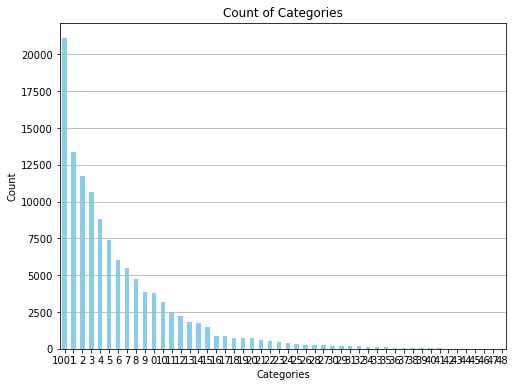

In [96]:
category_counts = data['Employed_years'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))

# Create the bar plot
category_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Show gridlines along the y-axis

plt.show()

Removing Employed_years column due to 17% outlier and and seems to be a data entry error and log transformation didn't make much impact on prediction

In [98]:
data["Appli_Process_Day"].value_counts()*100/len(data["Appli_Process_Day"])

1    84.069722
0    15.930278
Name: Appli_Process_Day, dtype: float64

In [99]:
#df1.info()

In [100]:
df1=data

In [101]:
data

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Total_Owned,Housing_Ownership,Age_years,Employed_years,Registration_years,ID_years,Appli_Process_Day,Appli_Process_Hour
0,12142509,77.747353,0.0,0.0,1.0,0.0,0.0,121.479290,66.206977,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.153055,0.511180,0.0186,63.0,NaN,0,0.0,1,38,3,17,1,0,1
1,12138936,98.326252,1.0,0.0,1.0,NaN,0.0,92.823520,56.411088,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,NaN,0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.037947,0.511180,NaN,NaN,NaN,0,1.0,1,39,11,21,0,1,0
2,12181264,96.004382,0.0,0.0,1.0,0.0,1.0,120.872608,62.940582,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,1,0,0,Realty agents,0,2.0,4.0,NaN,Yes,Yes,Self-employed,0.501213,0.193650,0.329655,0.0742,277.0,0.0,0,0.0,0,46,14,<NA>,1,1,2
3,12188929,93.405636,0.0,0.0,1.0,1.0,0.0,118.686971,59.893974,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,1,0,0,NaN,0,3.0,2.0,15.0,Yes,Yes,XNA,0.501213,0.016077,0.631355,NaN,1700.0,1.0,0,0.0,1,64,1001,<NA>,2,1,1
4,12133385,108.717435,1.0,0.0,1.0,0.0,2.0,139.370207,66.818167,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,6.0,1,0,0,Laborers,0,1.0,3.0,NaN,Yes,Yes,Business Entity,0.508199,0.069313,0.355639,0.2021,674.0,1.0,0,1.0,1,31,8,15,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,105.753849,0.0,0.0,NaN,1.0,0.0,134.287022,64.968742,Relative,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661.0,2943.0,NaN,1,0,0,Laborers,0,2.0,4.0,16.0,Yes,No,Business Entity,0.501213,0.025604,0.184116,0.0577,0.0,1.0,1,0.0,1,35,8,7,8,1,1
121852,12173765,93.405636,0.0,1.0,1.0,0.0,0.0,133.509111,66.069341,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902.0,1209.0,NaN,1,1,0,Sales,0,3.0,4.0,12.0,Yes,Yes,Self-employed,0.501213,0.099823,0.406617,0.0825,4.0,0.0,0,1.0,1,24,2,2,3,1,1
121853,12103937,80.995370,0.0,1.0,0.0,1.0,1.0,119.182341,64.050341,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980.0,353.0,NaN,1,0,0,High skill tech,0,3.0,5.0,11.0,No,No,Trade:,0.169049,0.002205,0.511180,NaN,0.0,NaN,0,1.0,1,25,4,11,1,1,0
121854,12170623,111.343121,1.0,1.0,0.0,1.0,0.0,114.799224,62.544623,Alone,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895.0,2902.0,4.0,1,0,0,Sales,0,2.0,1.0,12.0,Yes,Yes,Business Entity,0.182737,0.009706,0.077499,0.0979,0.0,1.0,0,2.0,1,28,2,2,8,1,1


In [102]:
df1=df1.drop(['ID','Car_Owned',"Bike_Owned","Active_Loan","House_Own",'Client_Housing_Type','Population_Region_Relative','Client_Occupation','Type_Organization','Population_Region_Relative','House_Own','Accompany_Client','Child_Count','Own_House_Age',
               'Mobile_Tag','Client_Permanent_Match_Tag','Score_Source_3','Social_Circle_Default','Age_Days', 'Employed_Days','Registration_Days', 'ID_Days','Application_Process_Day','Application_Process_Hour',"Employed_years","Registration_years"], axis=1)
#data.dropna(axis = 0,thresh=30,inplace = True)
#df1.shape

In [103]:
df1

,Client_Income,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Client_Contact_Work_Tag,Score_Source_1,Score_Source_2,Phone_Change,Credit_Bureau,Default,Total_Owned,Housing_Ownership,Age_years,ID_years,Appli_Process_Day,Appli_Process_Hour
0,77.747353,121.479290,66.206977,Commercial,Secondary,M,Male,CL,1,0,0,2.0,Yes,0.568066,0.153055,63.0,NaN,0,0.0,1,38,1,0,1
1,98.326252,92.823520,56.411088,Service,Graduation,M,Male,CL,0,1,0,2.0,Yes,0.563360,0.037947,NaN,NaN,0,1.0,1,39,0,1,0
2,96.004382,120.872608,62.940582,Service,Graduation dropout,W,Male,CL,0,0,0,2.0,Yes,0.501213,0.193650,277.0,0.0,0,0.0,0,46,1,1,2
3,93.405636,118.686971,59.893974,Retired,Secondary,M,Male,CL,0,0,0,3.0,Yes,0.501213,0.016077,1700.0,1.0,0,0.0,1,64,2,1,1
4,108.717435,139.370207,66.818167,Commercial,Secondary,M,Female,CL,0,0,0,1.0,Yes,0.508199,0.069313,674.0,1.0,0,1.0,1,31,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,105.753849,134.287022,64.968742,Service,Secondary,M,Female,CL,0,0,0,2.0,No,0.501213,0.025604,0.0,1.0,1,0.0,1,35,8,1,1
121852,93.405636,133.509111,66.069341,Commercial,Graduation,M,Female,CL,1,0,0,3.0,Yes,0.501213,0.099823,4.0,0.0,0,1.0,1,24,3,1,1
121853,80.995370,119.182341,64.050341,Govt Job,Secondary,M,Male,CL,0,0,0,3.0,No,0.169049,0.002205,0.0,NaN,0,1.0,1,25,1,1,0
121854,111.343121,114.799224,62.544623,Service,Graduation,M,Female,CL,0,0,0,2.0,Yes,0.182737,0.009706,0.0,1.0,0,2.0,1,28,8,1,1


In [104]:
df1.reset_index(drop=True, inplace=True)
# Reorder columns to arrange 'default' as the last column
default_column = df1.pop('Default')  # Extract 'default' column
df1['Default'] = default_column  # Place 'default' column at the end
df1

,Client_Income,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Client_Contact_Work_Tag,Score_Source_1,Score_Source_2,Phone_Change,Credit_Bureau,Total_Owned,Housing_Ownership,Age_years,ID_years,Appli_Process_Day,Appli_Process_Hour,Default
0,77.747353,121.479290,66.206977,Commercial,Secondary,M,Male,CL,1,0,0,2.0,Yes,0.568066,0.153055,63.0,NaN,0.0,1,38,1,0,1,0
1,98.326252,92.823520,56.411088,Service,Graduation,M,Male,CL,0,1,0,2.0,Yes,0.563360,0.037947,NaN,NaN,1.0,1,39,0,1,0,0
2,96.004382,120.872608,62.940582,Service,Graduation dropout,W,Male,CL,0,0,0,2.0,Yes,0.501213,0.193650,277.0,0.0,0.0,0,46,1,1,2,0
3,93.405636,118.686971,59.893974,Retired,Secondary,M,Male,CL,0,0,0,3.0,Yes,0.501213,0.016077,1700.0,1.0,0.0,1,64,2,1,1,0
4,108.717435,139.370207,66.818167,Commercial,Secondary,M,Female,CL,0,0,0,1.0,Yes,0.508199,0.069313,674.0,1.0,1.0,1,31,11,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,105.753849,134.287022,64.968742,Service,Secondary,M,Female,CL,0,0,0,2.0,No,0.501213,0.025604,0.0,1.0,0.0,1,35,8,1,1,1
121852,93.405636,133.509111,66.069341,Commercial,Graduation,M,Female,CL,1,0,0,3.0,Yes,0.501213,0.099823,4.0,0.0,1.0,1,24,3,1,1,0
121853,80.995370,119.182341,64.050341,Govt Job,Secondary,M,Male,CL,0,0,0,3.0,No,0.169049,0.002205,0.0,NaN,1.0,1,25,1,1,0,0
121854,111.343121,114.799224,62.544623,Service,Graduation,M,Female,CL,0,0,0,2.0,Yes,0.182737,0.009706,0.0,1.0,2.0,1,28,8,1,1,0


In [105]:
df1.to_csv('df.csv', index=False)
